In [1]:
# import some libraries
# =====================
# module for numerical computing.
import numpy as np 

# module for plotting.
import matplotlib.pyplot as plt

# the epm-tracker package
import epm.analysis as epm_analysis

# run some 'magic' commands
# =========================
# allows plots to be displayed
# in this html browser/notebook.
%matplotlib inline

In [4]:
# load in you data
# ================
# the TrackingData class is found in analysis.py, and
# provides a convienent wrapper for looking at your 
# tracking data
tracking_data = epm_analysis.TrackingData(
        'data/test3-tracking-data.xlsx'
    )

# the EPMArena class is also found in analysis.py and
# provides a convienent wrapper for storing information
# about the arena mask you created in the GUI (note that
# you must pass the pixel mask file with "-pixel-coords"
# appended to the end of its name.
arena = epm_analysis.EPMArena(
        'data/test3-mask-pixel-coords.xlsx'
    )

In [5]:
# Take a look at whats contained in your tracking_data
# these are the row-based, pixel coordinates of your
# mouse across every frame.
tracking_data.rr

array([ 211.41780822,  211.41780822,  211.41780822, ...,   43.21818182,
         43.21818182,   43.21818182])

In [7]:
# these are the column-based, pixel coordinates of your
# mouse across every frame.
tracking_data.cc

array([ 215.98287671,  215.98287671,  215.98287671, ...,  212.71818182,
        212.71818182,  212.71818182])

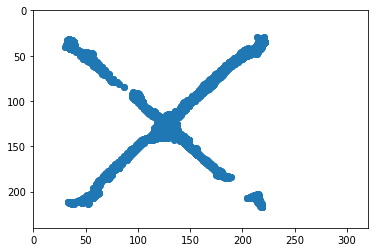

In [8]:
# above, are simply the coordinates of the mouse in the EPM during the 
# tracking trial. you can plot these data as follows:

# create a figure and axes handle to plot on
fig, ax = plt.subplots()
# create a scatter plot of the tracking coords
ax.scatter(tracking_data.cc, tracking_data.rr)
# set the x-limit to match the shape of the video frame
ax.set_xlim(0, 320)
# set the y-limit to match the shape of the video frame
ax.set_ylim(0, 240)
# invert the y-axis, so that the track matches 
# what you observe in the video.
ax.invert_yaxis()

In [10]:
# you can get the total distance the mouse has traveled as follows:
total_distance = epm_analysis.get_total_distance_traveled(tracking_data)
print total_distance

5944.43012504


In [11]:
# the above means that the mouse traveled a total of 5944.43 pixels over
# the course of the recording.

# you can also get the total distance that the mouse traveled from one
# frame to the next, for all frames, by calling:
distance_per_frame = epm_analysis.get_per_frame_distance_traveled(tracking_data)
distance_per_frame

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

<hr>

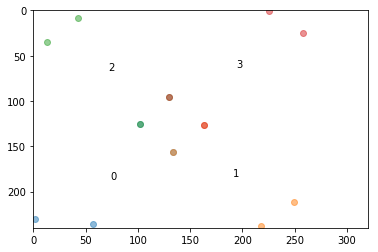

In [12]:
# Now, we can get data specific to the EPM by using the tracking_data
# and arena variables together.

# first, use the arena variable to plot the arena, and determine arm 
# labels
fig, ax = plt.subplots()
ax = arena.plot_arms(ax)

In [20]:
# Now that we know how the arena is oriented, we can specify which arms are 
# open, and which arms are closed, as follows:
arena.set_open_arms(1, 2)
arena.set_closed_arms(0, 3)

In [21]:
# And then we can call EMP-specific analysis functions.

# First, determine the fraction of time that the mouse spent in the
# open arms:
time_in_open = epm_analysis.get_time_in_open_arms(tracking_data, arena)
print time_in_open

0.26917989418


In [22]:
# Then, determine the fraction of time the mouse spent in the
# closed arms:
time_in_closed = epm_analysis.get_time_in_closed_arms(tracking_data, arena)
print time_in_closed

0.583553791887


In [23]:
# finally, determine the fraction of time the mouse spent in the
# center of the EPM:
time_in_center = epm_analysis.get_time_in_center(tracking_data, arena)
print time_in_center

0.147266313933


In [24]:
# Note that these should add up to 1.
print time_in_open + time_in_closed + time_in_center

1.0


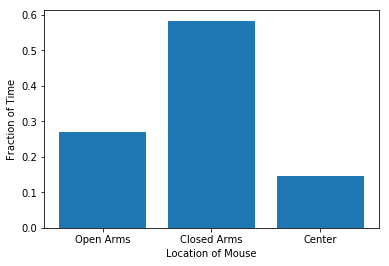

In [25]:
# you can also plot these here if you want.
fig, ax = plt.subplots()
ax.bar(left=[0, 1, 2], height=[time_in_open, time_in_closed, time_in_center])
ax.set_ylabel('Fraction of Time')
ax.set_xlabel('Location of Mouse')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Open Arms', 'Closed Arms', 'Center'])